In [1]:
%config IPCompleter.greedy=True

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
data = pd.read_csv('results.csv')
data

,n,min,max
0,100,3,25
1,100,6,36
2,100,4,32
3,100,2,38
4,100,2,34
...,...,...,...
99995,10000,4,305
99996,10000,2,323
99997,10000,2,441
99998,10000,2,263


In [5]:
summary = data.groupby('n').agg([np.min, np.max, np.mean, np.var, np.std])
summary

min                                  max                             \
      amin amax   mean       var       std amin amax     mean          var   
n                                                                            
100      1   15  3.425  3.962337  1.990562   14   54   29.136    41.967471   
200      1   13  3.528  3.638855  1.907578   20   72   43.059    92.632151   
300      1   11  3.454  3.347231  1.829544   27   98   54.370   137.886987   
400      1   11  3.419  3.190630  1.786233   33  122   64.009   199.700620   
500      1   14  3.542  3.866102  1.966241   38  139   71.480   249.455055   
...    ...  ...    ...       ...       ...  ...  ...      ...          ...   
9600     1   12  3.572  3.812629  1.952595  171  680  336.330  5003.666767   
9700     1   13  3.496  3.621606  1.903052  166  611  340.591  5410.626345   
9800     1   12  3.646  3.668352  1.915294  180  645  343.693  5465.744495   
9900     1   19  3.471  3.875034  1.968511  165  650  346.574  5678.158683   
10000    1   13  3.513  3.503334  1.871720  159  703  344.875  5866.968343   

                  
             std  
n                 
100     6.478231  
200     9.624560  
300    11.742529  
400    14.131547  
500    15.794146  
...          ...  
9600   70.736601  
9700   73.556960  
9800   73.930674  
9900   75.353558  
10000  76.596138  

[100 rows x 10 columns]

In [7]:
min = summary['min']
max = summary['max']

# Nierówność Czebyszewa

Do analizy danych użyjemy nierówności Czebyszewa. Dla przypomnienia - wygląda ona następująco:

$P(|X - E(X)| \geq t) \leq \frac{\mathrm{Var}(X)}{t^2}$.

Przyjmijmy ograniczenie $\frac{\mathrm{Var}(X)}{t^2} = g$ i stąd otrzymujemy $t = \sqrt{\frac{\mathrm{Var}(X)}{g}}$.


In [25]:
def compute_t(data, g):
    return np.sqrt(data['var'] / g)

Dla nierówności Czebyszewa możemy wyliczyć górne oraz dolne ograniczenia:
    
$X_u = E(X) + t$

$X_t = E(X) - t$

In [8]:
def compute_chebyschev_bounds(data, t):
    return data['mean'] + t, data['mean'] -t

In [23]:
def draw_plot(data, t, xu, xl, th_ex=None):
    x = np.linspace(100, 10000, 100)
    fig, ax = plt.subplots(figsize=(10,10))
    ax.plot(x, data['amin'], label='min')
    ax.plot(x, data['amax'], label='max')
    ax.plot(x, data['mean'], label='mean')
    ax.plot(x, xu, label='chebyschev upper')
    ax.plot(x, xl, label='chebyschev lower')
    
    if th_ex != None:
        ax.plot(x, th_ex, label='theoretical Ex')
    
    ax.legend()

# Analiza dla najkrótszych ścieżek

In [30]:
t_min = compute_t(min, 0.2)
xu_min, xl_min = compute_chebyschev_bounds(min, t_min)

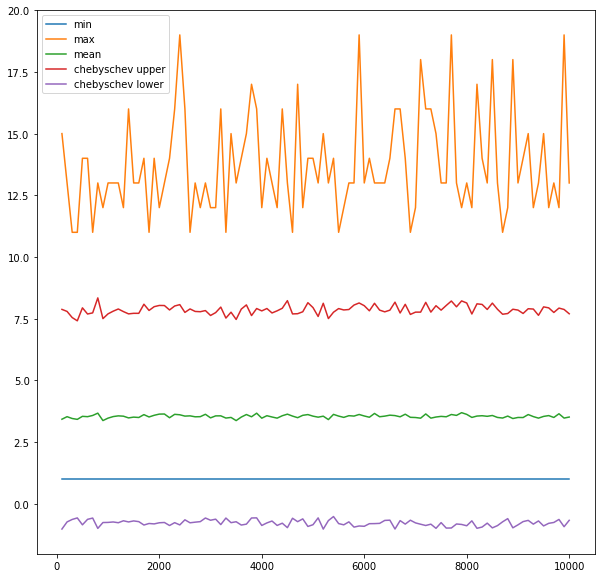

In [31]:
draw_plot(min, t_min, xu_min, xl_min)

# Analiza dla najdłuższych ścieżek

In [64]:
t_max = compute_t(max, 0.005)
xu_max, xl_max = compute_chebyschev_bounds(max, t_max)

In [65]:
th_ex_max = [3.5*math.sqrt(x) for x in range(100, 10001, 100)]

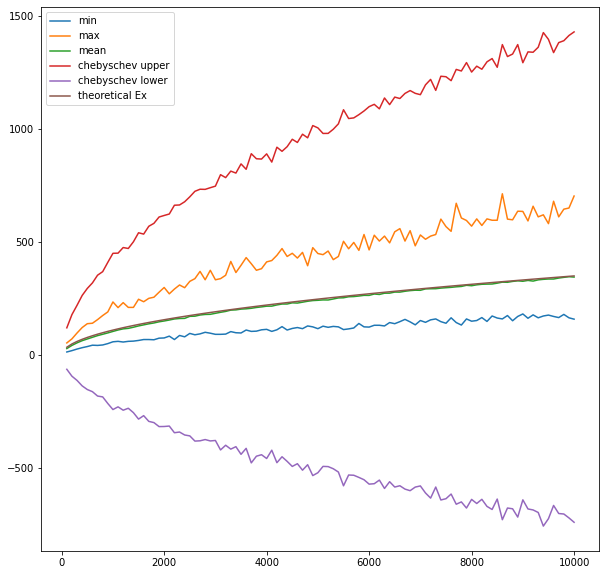

In [66]:
draw_plot(max, t_max, xu_max, xl_max, th_ex_max)